In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as plt
import seaborn as sns

# 1) Paths and existence check
DATA_PATH = r"C:\Users\habib\OneDrive\المستندات\Graduation Project\GRAD-proj-DEPI\DS2\heart_cleveland_upload.csv"  
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"

# 2) Load dataset
df = pd.read_csv(DATA_PATH)

# 3) Inspect shape, columns, and dtypes (before rename)
print("Shape:", df.shape)
print("\nOriginal columns:\n", list(df.columns))
print("\nData types:\n", df.dtypes)

Shape: (297, 14)

Original columns:
 ['Age (years)', 'Sex', 'Chest Pain Type', 'Resting BP (mm Hg)', 'Cholesterol (mg/dl)', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate (bpm)', 'Exercise Angina', 'ST Depression (oldpeak)', 'ST Slope', 'Major Vessels (0–3)', 'Thalassemia', 'Heart Disease Class (0,1)']

Data types:
 Age (years)                    int64
Sex                            int64
Chest Pain Type                int64
Resting BP (mm Hg)             int64
Cholesterol (mg/dl)            int64
Fasting Blood Sugar            int64
Resting ECG                    int64
Max Heart Rate (bpm)           int64
Exercise Angina                int64
ST Depression (oldpeak)      float64
ST Slope                       int64
Major Vessels (0–3)            int64
Thalassemia                    int64
Heart Disease Class (0,1)      int64
dtype: object


In [2]:
# 4) Define friendly column names mapping
friendly_map = {
    "age": "Age (years)",
    "sex": "Sex",
    "cp": "Chest Pain Type",
    "trestbps": "Resting BP (mm Hg)",
    "chol": "Cholesterol (mg/dl)",
    "fbs": "Fasting Blood Sugar",
    "restecg": "Resting ECG",
    "thalach": "Max Heart Rate (bpm)",
    "exang": "Exercise Angina",
    "oldpeak": "ST Depression (oldpeak)",
    "slope": "ST Slope",
    "ca": "Major Vessels (0–3)",
    "thal": "Thalassemia",
    "condition": "Heart Disease Class (0,1)"
}


# Only rename keys that exist to avoid errors
friendly_map_existing = {k: v for k, v in friendly_map.items() if k in df.columns}

# 5) Apply rename
df = df.rename(columns=friendly_map_existing)

# 6) Confirm new header and dtypes
print("\nRenamed columns:\n", list(df.columns))
print("\nData types after rename (types don’t change by rename):\n", df.dtypes)
# save the cleaned dataset
CLEANED_DATA_PATH = r"C:\Users\habib\OneDrive\المستندات\Graduation Project\GRAD-proj-DEPI\DS2\heart_cleveland_upload.csv"
df.to_csv(CLEANED_DATA_PATH, index=False)


Renamed columns:
 ['Age (years)', 'Sex', 'Chest Pain Type', 'Resting BP (mm Hg)', 'Cholesterol (mg/dl)', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate (bpm)', 'Exercise Angina', 'ST Depression (oldpeak)', 'ST Slope', 'Major Vessels (0–3)', 'Thalassemia', 'Heart Disease Class (0,1)']

Data types after rename (types don’t change by rename):
 Age (years)                    int64
Sex                            int64
Chest Pain Type                int64
Resting BP (mm Hg)             int64
Cholesterol (mg/dl)            int64
Fasting Blood Sugar            int64
Resting ECG                    int64
Max Heart Rate (bpm)           int64
Exercise Angina                int64
ST Depression (oldpeak)      float64
ST Slope                       int64
Major Vessels (0–3)            int64
Thalassemia                    int64
Heart Disease Class (0,1)      int64
dtype: object


In [3]:
# 7) Quick peek of first rows
print("\nHead preview:")
df.head(10)


Head preview:


,Age (years),Sex,Chest Pain Type,Resting BP (mm Hg),Cholesterol (mg/dl),Fasting Blood Sugar,Resting ECG,Max Heart Rate (bpm),Exercise Angina,ST Depression (oldpeak),ST Slope,Major Vessels (0–3),Thalassemia,"Heart Disease Class (0,1)"
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
# Define essential, useful columns
ESSENTIAL_NUM = [
    "Age (years)", "Resting BP (mm Hg)", "Cholesterol (mg/dl)",
    "Max Heart Rate (bpm)", "ST Depression (oldpeak)", "Major Vessels (0–3)"
]
ESSENTIAL_CAT = [
    "Chest Pain Type", "Resting ECG", "ST Slope", "Thalassemia", "Sex"
]
ESSENTIAL_BIN = [
    "Fasting Blood Sugar", "Exercise Angina"
]
TARGET = "Heart Disease Class (0,1)"

In [5]:
#Identify unneeded columns to drop (e.g., Record ID, any extras not in the above sets)
friendly_sets = set(ESSENTIAL_NUM + ESSENTIAL_CAT + ESSENTIAL_BIN + [TARGET] )
existing_cols = set(df.columns)
drop_candidates = sorted([c for c in existing_cols if c not in friendly_sets])

# Drop truly irrelevant columns now
df_clean = df.drop(columns=drop_candidates, errors="ignore").copy()
print("Dropped irrelevant columns:", drop_candidates)

Dropped irrelevant columns: []


In [6]:
# Remove duplicates
before = len(df_clean)
df_clean = df_clean.drop_duplicates()
after = len(df_clean)
print(f"Duplicates removed: {before - after} (from {before} to {after})")

Duplicates removed: 0 (from 297 to 297)


In [7]:
nulls = df_clean.isna().sum().reset_index()
nulls

,index,0
0,Age (years),0
1,Sex,0
2,Chest Pain Type,0
3,Resting BP (mm Hg),0
4,Cholesterol (mg/dl),0
5,Fasting Blood Sugar,0
6,Resting ECG,0
7,Max Heart Rate (bpm),0
8,Exercise Angina,0
9,ST Depression (oldpeak),0


**EDA**

In [8]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots


In [9]:


plt.rcParams.update({
    "figure.facecolor":"white","axes.facecolor":"white","axes.edgecolor":"#222",
    "axes.labelcolor":"#222","xtick.color":"#222","ytick.color":"#222",
    "font.size":11,"axes.grid":True,"grid.color":"#eee","axes.titleweight":"bold"
})


TGT = "Heart Disease Class (0,1)"
NUM = ["Age (years)", "Resting BP (mm Hg)", "Cholesterol (mg/dl)",
       "Max Heart Rate (bpm)", "ST Depression (oldpeak)"]
CAT = ["Chest Pain Type","Resting ECG","ST Slope","Thalassemia","Major Vessels (0–3)"]

# Visualization copy: exclude Unknown in charts for clarity (kept in df for modeling)
df_viz = df.copy()
for c in CAT:
    if c in df_viz.columns:
        df_viz = df_viz[df_viz[c].astype(str) != "Unknown"]

print("EDA data (visuals) shape:", df_viz.shape)


EDA data (visuals) shape: (297, 14)


**A) Univariate analysis**
> Numeric: histograms to see shape and outliers.

> Categorical: count plots.

In [10]:

label_map = {0: 'No Disease (0)', 1: 'Disease (1)'}

heart_counts = (
    df_viz[TGT]
    .value_counts(dropna=False)
    .sort_index()
    .rename(index=label_map)  # map 0/1 to readable labels
    .reset_index()
)
heart_counts.columns = ['Heart Disease Type', 'Count']
heart_counts['Percent'] = (heart_counts['Count'] / heart_counts['Count'].sum() * 100).round(1)

fig = px.pie(
    heart_counts,
    names='Heart Disease Type',
    values='Count',
    title='Heart Disease Type Distribution (0 = No, 1 = Yes)',
    color='Heart Disease Type',
    color_discrete_sequence=px.colors.sequential.Viridis,
    hole=0.35
)

fig.update_traces(
    textposition='outside',
    texttemplate="%{label}: %{percent:.1%}",
    hovertemplate="Class %{label}<br>Count %{value}<br>% %{percent:.1%}<extra></extra>",
    pull=[0.03] * len(heart_counts)
)
fig.update_layout(showlegend=False, paper_bgcolor="white", plot_bgcolor="white")
fig.show()


In [11]:
palette = {0:"#2F4B7C",1:"#F95D6A",2:"#00A7A7",3:"#FFB000",4:"#6A4C93"}

rows, cols = 2, 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=NUM)

def add_numeric_panel(fig, col, r, c):
    # Density-like smooth histogram per class, stacked for clarity
    classes = sorted(df_viz[TGT].dropna().unique())
    ymax = 0
    for k in classes:
        s = df_viz.loc[df_viz[TGT]==k, col].dropna()
        if s.empty: continue
        hist = np.histogram(s, bins=30, density=False)
        x = (hist[1][1:] + hist[1][:-1]) / 2
        y = hist[0]
        ymax = max(ymax, y.max() if len(y) else 0)
        fig.add_trace(go.Scatter(
            x=x, y=y, mode="lines", line=dict(color=palette[int(k)], width=2),
            name=f"Class {int(k)}", hovertemplate=f"{col}=%{{x}}<br>Count=%{{y}}<extra></extra>"
        ), row=r, col=c)
    # Global median and range annotation
    s_all = df_viz[col].dropna()
    if not s_all.empty:
        med = s_all.median()
        fig.add_shape(type="line", x0=med, x1=med, y0=0, y1=ymax*1.05,
                      line=dict(color="#A0AEC0", width=2, dash="dash"), row=r, col=c)
        fig.add_annotation(text=f"Median {med:.1f}", x=med, y=ymax*1.08,
                           xref=f"x{'' if (r-1)*cols+c==1 else (r-1)*cols+c}",
                           yref=f"y{'' if (r-1)*cols+c==1 else (r-1)*cols+c}",
                           showarrow=False, font=dict(size=10, color="#333"))

    fig.update_xaxes(title_text=col, row=r, col=c)
    fig.update_yaxes(title_text="Count", row=r, col=c)

r=c=1
for i, col in enumerate(NUM):
    add_numeric_panel(fig, col, r, c)
    c += 1
    if c > cols: c, r = 1, r+1

fig.update_layout(height=720, width=1020, title_text="Target vs Numeric",
                  template="plotly_white", legend_title="Class")
fig.show()


In [12]:
df_viz = df_viz.rename(columns=friendly_map_existing)


In [13]:
# Ensure Count is numeric
heart_counts['Count'] = pd.to_numeric(heart_counts['Count'], errors='coerce').fillna(0).astype(int)
total = int(heart_counts['Count'].sum())

# Safe percentage (avoid division by zero)
if total == 0:
    heart_counts['Percent'] = 0.0
else:
    heart_counts['Percent'] = (heart_counts['Count'].values / total * 100).round(1)


In [14]:
# 1) Verify cat_cols exist
missing = [c for c in CAT if c not in df_viz.columns]
if missing:
    raise KeyError(f"Missing columns in df_viz: {missing}")

# 2) Preview a counts frame once
test_col = CAT[0]
tmp = df_viz[test_col].astype(str).value_counts(dropna=False).reset_index()
print(tmp.head())           


  Chest Pain Type  count
0               3    142
1               2     83
2               1     49
3               0     23


In [15]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

palette = px.colors.sequential.Viridis

def plot_categorical_distributions(df, cat_cols, target=None):
    """
    Plot bar charts for categorical columns with counts and optional target overlay.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing categorical and target columns
        cat_cols (list[str]): List of categorical column names
        target (str, optional): Target column for overlay (% of target=1)
    """
    for col in cat_cols:
        # Build counts dataframe
        counts = (
            df[col].astype(str)
            .value_counts(dropna=False)
            .sort_index()
            .reset_index()
        )
        counts.columns = ['category', 'Count']
        counts['Count'] = pd.to_numeric(counts['Count'], errors='coerce').fillna(0).astype(int)
        total = int(counts['Count'].sum())
        counts['Percent'] = (counts['Count'] / total * 100).round(1) if total else 0.0

        # Build x-axis labels
        xvals = ["<br>".join(v.split()) for v in counts['category'].astype(str)]

        # Create figure
        fig = go.Figure()

        # Bar trace
        bar = go.Bar(
            x=xvals,
            y=counts['Count'],
            text=[f"{p}%" for p in counts['Percent']],
            textposition='outside',
            name=f"{col} Count",
            marker=dict(color=palette[0]),
            hovertemplate=f"<b>{col}</b><br>Class: %{{x}}<br>Count: %{{y}}<br>Percent: %{{text}}<extra></extra>"
        )
        fig.add_trace(bar)

        # Optional target overlay (% target=1 per category)
        if target and target in df.columns:
            cond_rate = (
                df.groupby(col)[target]
                  .mean()
                  .reindex(df[col].dropna().astype(str).unique(), fill_value=0)
                  .mul(100)
                  .round(1)
            )

            fig.update_layout(
                yaxis2=dict(
                    title='% with Disease',
                    overlaying='y',
                    side='right',
                    showgrid=False
                )
            )

        # Layout styling
        fig.update_layout(
            title=f"{col} Distribution",
            xaxis_title=col,
            yaxis_title="Count",
            template="plotly_white",
            paper_bgcolor="white",
            plot_bgcolor="white",
            bargap=0.3,
            width=750,
            height=450,
            legend=dict(orientation="h", y=-0.2)
        )

        fig.show()

# Run for all categorical features
plot_categorical_distributions(df_viz, CAT, target=TARGET)


In [16]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

def plot_numeric_distributions(df, num_cols, target=None, bins=25):
    """
    Plot interactive histograms for numeric columns with optional target overlay.
    
    Parameters:
        df (pd.DataFrame): DataFrame with numeric and optional target columns
        num_cols (list[str]): List of numeric column names
        target (str, optional): Target column for overlay distribution
        bins (int): Number of bins in the histogram
    """
    for col in NUM:
        fig = go.Figure()

        # Main histogram (for all samples)
        hist = go.Histogram(
            x=df[col],
            nbinsx=bins,
            name="All Samples",
            marker=dict(color=palette[0], opacity=0.7),
            hovertemplate=f"<b>{col}</b><br>Value: %{{x:.2f}}<br>Count: %{{y}}<extra></extra>"
        )
        fig.add_trace(hist)

        # Optional overlay by target
        if target and target in df.columns:
            for i, cls in enumerate(sorted(df[target].unique())):
                subset = df[df[target] == cls]
                fig.add_trace(
                    go.Histogram(
                        x=subset[col],
                        nbinsx=bins,
                        name=f"{target}={cls}",
                        marker=dict(color=palette[i + 1], opacity=0.5),
                        hovertemplate=f"<b>{col}</b><br>Value: %{{x:.2f}}<br>Count: %{{y}}<br>{target}={cls}<extra></extra>"
                    )
                )

            fig.update_layout(barmode='overlay')

        # Layout styling
        fig.update_layout(
            title=f"{col} Distribution",
            xaxis_title=col,
            yaxis_title="Count",
            template="plotly_white",
            paper_bgcolor="white",
            plot_bgcolor="white",
            width=750,
            height=450,
            legend=dict(orientation="h", y=-0.25),
            bargap=0.05
        )

        fig.show()

# ✅ Run for all numeric columns
plot_numeric_distributions(df_viz, ESSENTIAL_NUM, target=TARGET)


In [17]:

corr = df[NUM].corr(numeric_only=True)
fig = px.imshow(corr, color_continuous_scale="Viridis", origin="lower",
                text_auto=True, aspect="auto",
                title="Correlation Map (Cleaned Numeric Features)")
fig.update_layout(plot_bgcolor="white", paper_bgcolor="white")
fig.show()


In [18]:
for col in ESSENTIAL_CAT:
    fig = px.histogram(
        df_viz, x=col, color=TARGET, 
        barmode='group',
        color_discrete_sequence=px.colors.qualitative.Set2,
        title=f"{col} vs {TARGET}",
        text_auto=True
    )
    fig.update_layout(template="plotly_white", xaxis_title=col, yaxis_title="Count")
    fig.show()


In [19]:
for col in ESSENTIAL_NUM:
    fig = px.box(
        df_viz, x=TARGET, y=col,
        color=TARGET,
        color_discrete_sequence=px.colors.sequential.Tealgrn,
        points="all",
        title=f"{col} by {TARGET}",
        width=700,
        height=400
    )
    fig.update_layout(
        template="plotly_white",
        xaxis_title="Target Class",
        yaxis_title=col,
        font=dict(size=14),
        boxmode="group",
        showlegend=False,
        margin=dict(t=60, b=40)
    )
    fig.update_traces(
        jitter=0.3,
        marker=dict(opacity=0.4, size=4)
    )
    fig.show()


In [20]:
import plotly.express as px

# Pairwise scatter plots
pairwise = px.scatter_matrix(
    df_viz,
    dimensions=ESSENTIAL_NUM,
    color=TARGET,
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Numeric Feature Pairwise Relationships"
)
pairwise.update_traces(diagonal_visible=False)
pairwise.update_layout(template="plotly_white", width=1000, height=1000)
pairwise.show()


In [21]:
import plotly.figure_factory as ff

corr = df_viz[ESSENTIAL_NUM + [TARGET]].corr()
fig = ff.create_annotated_heatmap(
    z=corr.values.round(2),
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    colorscale='RdBu',
    reversescale=True
)
fig.update_layout(title="Correlation Heatmap", width=700, height=700)
fig.show()


In [22]:
TARGET = "Heart Disease Class (0,1)"
NUM_all = ["Age (years)","Resting BP (mm Hg)","Cholesterol (mg/dl)",
           "Max Heart Rate (bpm)","ST Depression (oldpeak)"]
CAT_all = ["Chest Pain Type","Resting ECG","ST Slope","Thalassemia","Major Vessels (0–3)"]
BIN_all = ["Fasting Blood Sugar","Exercise Angina",
           "Fasting Blood Sugar Missing","Exercise Angina Missing"]

# Auto-create missing flags if absent
for base in ["Fasting Blood Sugar","Exercise Angina"]:
    flag = f"{base} Missing"
    if base in df.columns and flag not in df.columns:
        df[flag] = df[base].isna().astype(int)

cols = set(df.columns)
NUM = [c for c in NUM_all if c in cols]
CAT = [c for c in CAT_all if c in cols]
BIN = [c for c in BIN_all if c in cols]

X = df[NUM + CAT + BIN].copy()
y = df[TARGET].astype(int).copy()

print("Using -> NUM:", NUM)
print("Using -> CAT:", CAT)
print("Using -> BIN:", BIN)
print("Shapes:", X.shape, y.shape)

Using -> NUM: ['Age (years)', 'Resting BP (mm Hg)', 'Cholesterol (mg/dl)', 'Max Heart Rate (bpm)', 'ST Depression (oldpeak)']
Using -> CAT: ['Chest Pain Type', 'Resting ECG', 'ST Slope', 'Thalassemia', 'Major Vessels (0–3)']
Using -> BIN: ['Fasting Blood Sugar', 'Exercise Angina', 'Fasting Blood Sugar Missing', 'Exercise Angina Missing']
Shapes: (297, 14) (297,)


In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd, os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import StratifiedKFold

from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

In [24]:


num_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

cat_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

bin_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent"))
])

pre = ColumnTransformer([
    ("num", num_pipe, NUM),
    ("cat", cat_pipe, CAT),
    ("bin", bin_pipe, BIN)
], remainder="drop")


In [25]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (237, 14) Test: (60, 14)


In [26]:

def evaluate_model(pipe, name):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    try:
        y_proba = pipe.predict_proba(X_test)
        roc_macro = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    except Exception:
        roc_macro = np.nan

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=3))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()
    return roc_macro



=== Logistic Regression (balanced) ===
              precision    recall  f1-score   support

           0      0.865     1.000     0.928        32
           1      1.000     0.821     0.902        28

    accuracy                          0.917        60
   macro avg      0.932     0.911     0.915        60
weighted avg      0.928     0.917     0.916        60



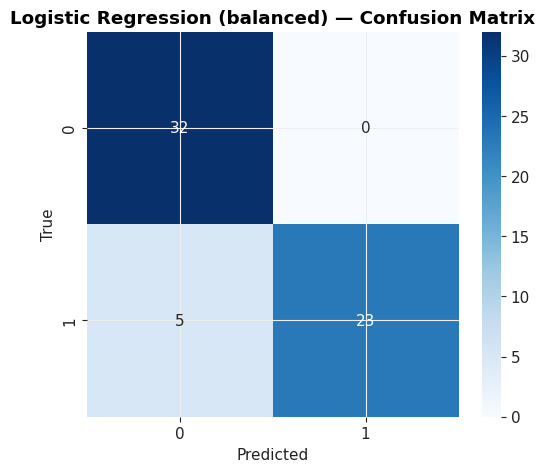

In [27]:

# Logistic Regression 
lr_pipe = Pipeline([
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None))
])
auc_lr = evaluate_model(lr_pipe, "Logistic Regression (balanced)")

##


=== Random Forest ===
              precision    recall  f1-score   support

           0      0.806     0.906     0.853        32
           1      0.875     0.750     0.808        28

    accuracy                          0.833        60
   macro avg      0.840     0.828     0.830        60
weighted avg      0.838     0.833     0.832        60



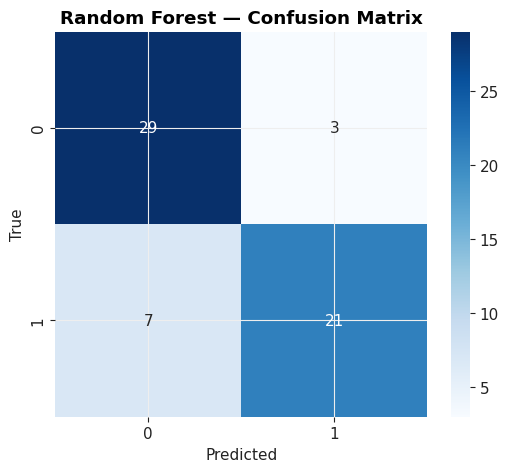

In [28]:
# Random Forest
rf_pipe = Pipeline([
    ("pre", pre),
    ("clf", RandomForestClassifier(
        n_estimators=500, max_depth=None, min_samples_split=4, min_samples_leaf=2,
        class_weight="balanced_subsample", random_state=42, n_jobs=-1
    ))
])
auc_rf = evaluate_model(rf_pipe, "Random Forest")

c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.





=== XGBoost Classifier ===
              precision    recall  f1-score   support

           0      0.794     0.844     0.818        32
           1      0.808     0.750     0.778        28

    accuracy                          0.800        60
   macro avg      0.801     0.797     0.798        60
weighted avg      0.800     0.800     0.799        60



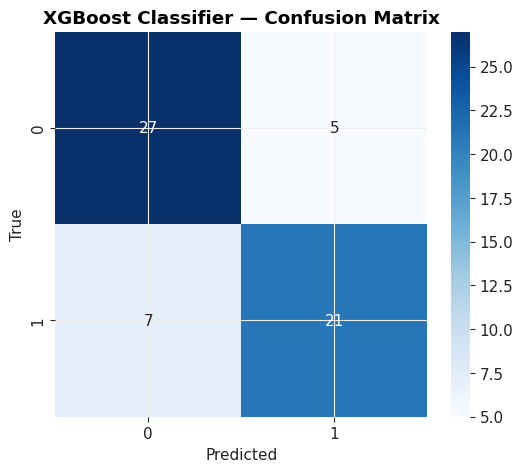

ROC AUC (XGBoost): nan


In [29]:
import xgboost as xgb

xgb_pipe = Pipeline([
    ("pre", pre),
    ("clf", xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ))
])
auc_xgb = evaluate_model(xgb_pipe, "XGBoost Classifier")
print(f"ROC AUC (XGBoost): {auc_xgb:.3f}")


In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 4, 5],
    "clf__learning_rate": [0.05, 0.1],
    "clf__subsample": [0.8, 1.0],
    "clf__colsample_bytree": [0.8, 1.0]
}

grid = GridSearchCV(
    xgb_pipe, param_grid,
    cv=5, scoring="roc_auc", n_jobs=-1, verbose=1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
y_pred_best = grid.predict(X_test)
y_proba_best = grid.predict_proba(X_test)[:, 1]
roc_best = roc_auc_score(y_test, y_proba_best)
print(f"ROC AUC (Best XGBoost): {roc_best:.3f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'clf__colsample_bytree': 1.0, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
ROC AUC (Best XGBoost): 0.943


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




                         Feature  Importance
8         cat__Chest Pain Type_3    0.163642
15            cat__Thalassemia_0    0.126944
18    cat__Major Vessels (0–3)_0    0.088101
17            cat__Thalassemia_2    0.057341
4   num__ST Depression (oldpeak)    0.056312
21    cat__Major Vessels (0–3)_3    0.055783
23          bin__Exercise Angina    0.054803


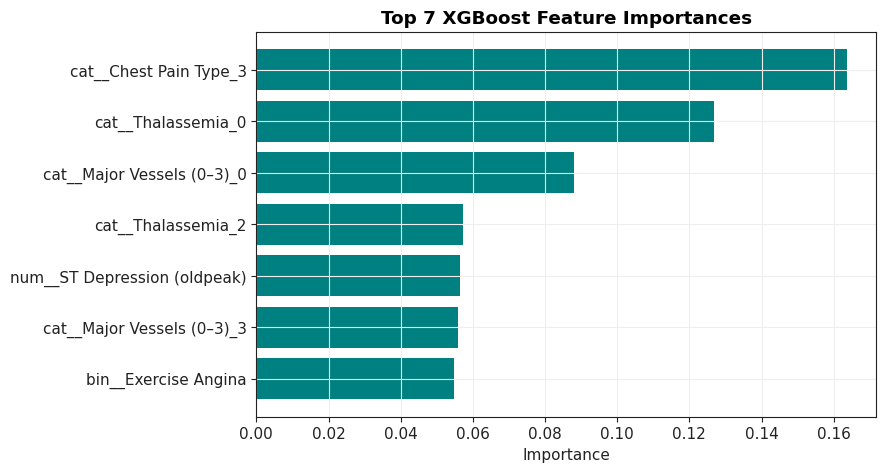

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the trained XGBoost model
xgb_model = grid.best_estimator_.named_steps['clf']

# Feature importance
importances = xgb_model.feature_importances_

# Feature names after preprocessing
feature_names = pre.get_feature_names_out()

# Create a DataFrame and sort
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Top 7 features
top7 = feat_imp.head(7)
print(top7)

# Plot top 7
plt.figure(figsize=(8,5))
plt.barh(top7['Feature'], top7['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title("Top 7 XGBoost Feature Importances")
plt.xlabel("Importance")
plt.show()


                         Feature  Importance
3      num__Max Heart Rate (bpm)    0.121657
4   num__ST Depression (oldpeak)    0.112593
8         cat__Chest Pain Type_3    0.110910
18    cat__Major Vessels (0–3)_0    0.096657
0               num__Age (years)    0.085727
15            cat__Thalassemia_0    0.081625
17            cat__Thalassemia_2    0.060729


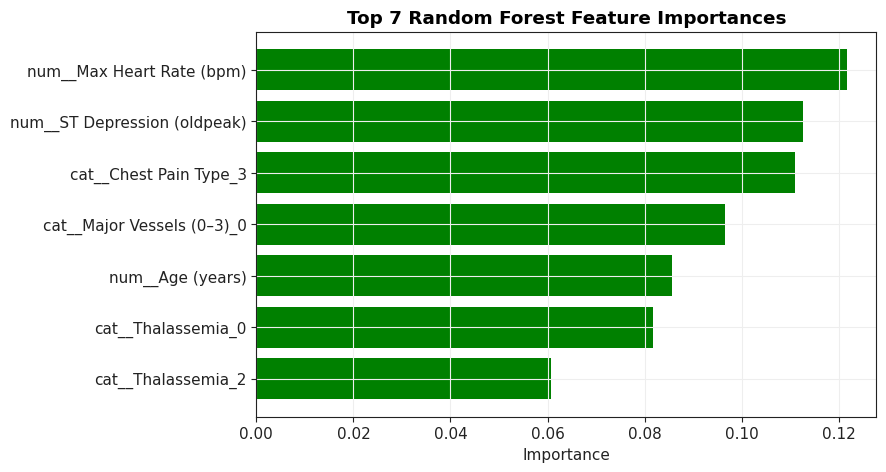

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Get trained Random Forest model
rf_model = rf_pipe.named_steps['clf']  # adjust if your pipeline name differs

# Feature importance
importances_rf = rf_model.feature_importances_

# Feature names after preprocessing
feature_names = pre.get_feature_names_out()

# Create DataFrame and sort
feat_imp_rf = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

# Top 7 features
top7_rf = feat_imp_rf.head(7)
print(top7_rf)

# Plot top 7
plt.figure(figsize=(8,5))
plt.barh(top7_rf['Feature'], top7_rf['Importance'], color='green')
plt.gca().invert_yaxis()
plt.title("Top 7 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.





=== XGBoost + SMOTE ===
              precision    recall  f1-score   support

           0      0.794     0.844     0.818        32
           1      0.808     0.750     0.778        28

    accuracy                          0.800        60
   macro avg      0.801     0.797     0.798        60
weighted avg      0.800     0.800     0.799        60



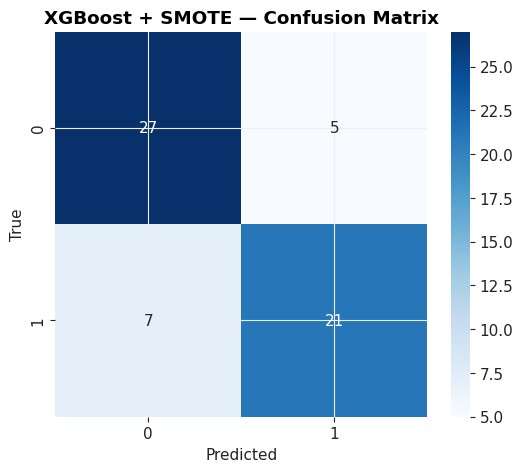

ROC AUC (XGBoost + SMOTE): nan


In [33]:
from imblearn.pipeline import Pipeline  # NOT sklearn.pipeline.Pipeline
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)

xgb_smt_pipe = Pipeline([
    ("pre", pre),
    ("smote", smote),
    ("clf", XGBClassifier(
        n_estimators=700, 
        max_depth=4, 
        learning_rate=0.05, 
        subsample=0.9, 
        colsample_bytree=0.9,
        objective="binary:logistic",  
        random_state=42,
        tree_method="hist",
        n_jobs=-1
    ))
])
auc_xgbS = evaluate_model(xgb_pipe, "XGBoost + SMOTE")
print(f"ROC AUC (XGBoost + SMOTE): {auc_xgbS:.3f}")



=== Decision Tree ===
              precision    recall  f1-score   support

           0      0.828     0.750     0.787        32
           1      0.742     0.821     0.780        28

    accuracy                          0.783        60
   macro avg      0.785     0.786     0.783        60
weighted avg      0.788     0.783     0.784        60



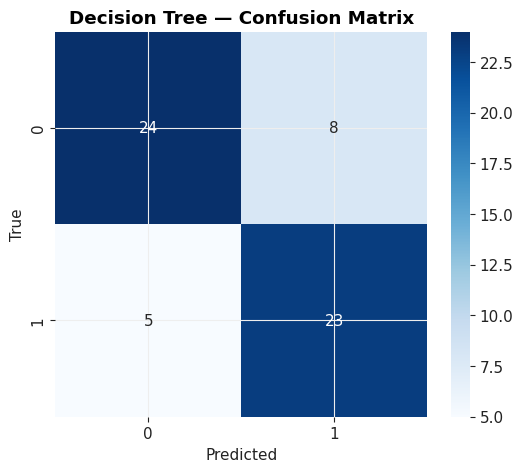

In [34]:

# 4) Decision Tree
dt_pipe = Pipeline([
    ("pre", pre),
    ("clf", DecisionTreeClassifier(
        max_depth=None, min_samples_split=4, min_samples_leaf=2,
        class_weight="balanced", random_state=42
    ))
])
auc_dt = evaluate_model(dt_pipe, "Decision Tree")


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0      0.795     0.969     0.873        32
           1      0.952     0.714     0.816        28

    accuracy                          0.850        60
   macro avg      0.874     0.842     0.845        60
weighted avg      0.868     0.850     0.847        60



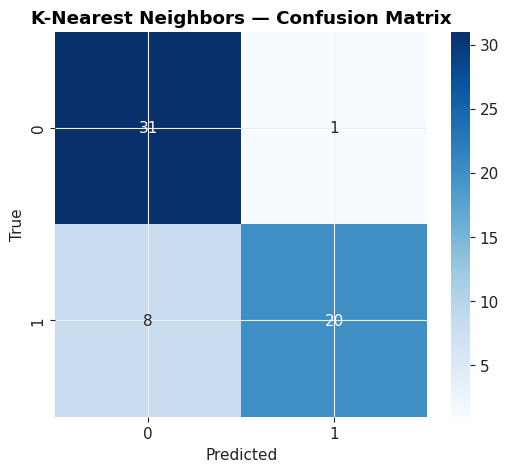

In [35]:

# 5) k-Nearest Neighbors (scaling handled in pre)
knn_pipe = Pipeline([
    ("pre", pre),
    ("clf", KNeighborsClassifier(n_neighbors=9, weights="distance"))
])

auc_knn = evaluate_model(knn_pipe, "K-Nearest Neighbors")


=== Naive Bayes ===
              precision    recall  f1-score   support

           0      0.821     1.000     0.901        32
           1      1.000     0.750     0.857        28

    accuracy                          0.883        60
   macro avg      0.910     0.875     0.879        60
weighted avg      0.904     0.883     0.881        60



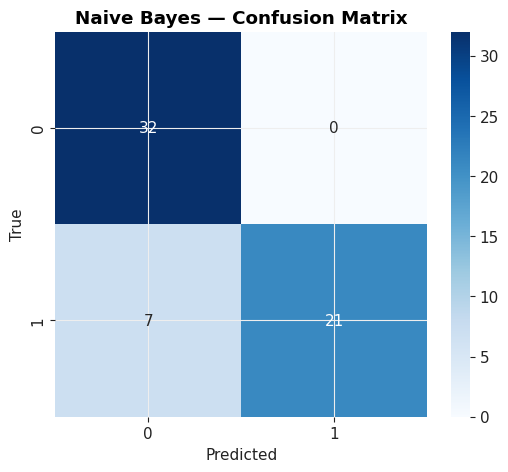

In [36]:
#6) Naive Bayes (GaussianNB works on dense numeric; after OHE it’s fine)
nb_pipe = Pipeline([
    ("pre", pre),
    ("clf", GaussianNB())
])
auc_nb = evaluate_model(nb_pipe, "Naive Bayes")


=== SVM -Linear  ===
              precision    recall  f1-score   support

           0      0.865     1.000     0.928        32
           1      1.000     0.821     0.902        28

    accuracy                          0.917        60
   macro avg      0.932     0.911     0.915        60
weighted avg      0.928     0.917     0.916        60



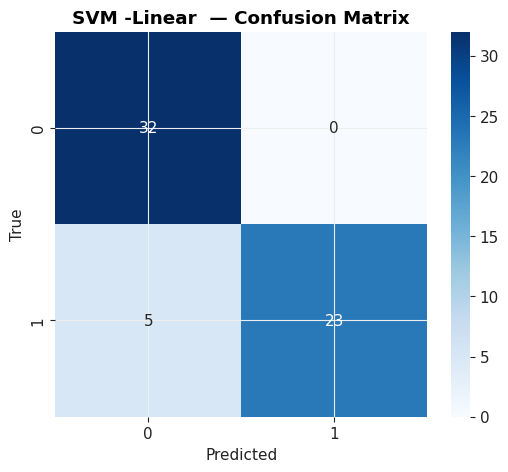

In [37]:
#7) SVM -Linear 
svm_lin_pipe = Pipeline([
    ("pre", pre),
    ("clf", SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42))
])
auc_lin = evaluate_model(svm_lin_pipe, "SVM -Linear ")


=== SVM -RBF ===
              precision    recall  f1-score   support

           0      0.816     0.969     0.886        32
           1      0.955     0.750     0.840        28

    accuracy                          0.867        60
   macro avg      0.885     0.859     0.863        60
weighted avg      0.881     0.867     0.864        60



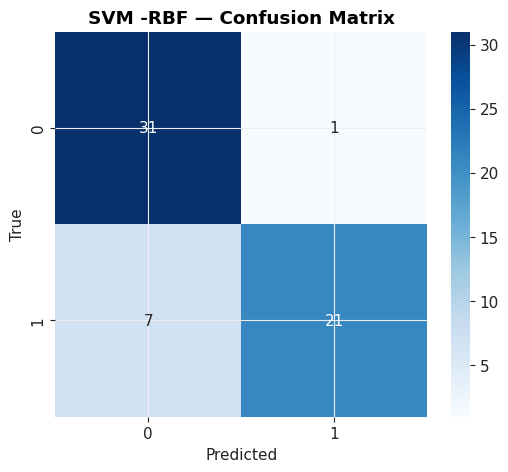

In [38]:
# SVM -RBF
svm_rbf_pipe = Pipeline([
    ("pre", pre),
    ("clf", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True,
               class_weight="balanced", random_state=42))
])
auc_rbf = evaluate_model(svm_rbf_pipe , "SVM -RBF")


=== Simple Neural Network (MLP) ===
              precision    recall  f1-score   support

           0      0.857     0.938     0.896        32
           1      0.920     0.821     0.868        28

    accuracy                          0.883        60
   macro avg      0.889     0.879     0.882        60
weighted avg      0.886     0.883     0.883        60



c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.



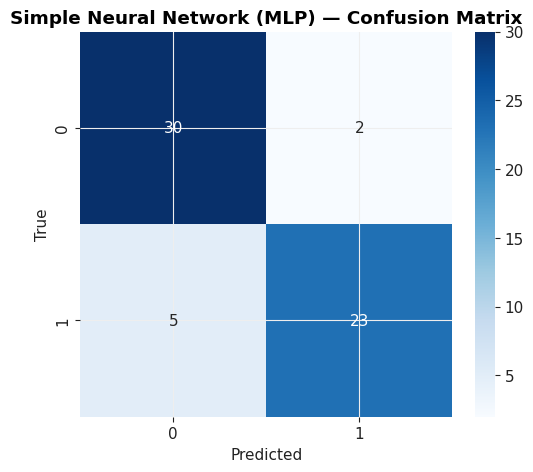

In [39]:
#8) Simple Neural Network (MLP)
mlp_pipe = Pipeline([
    ("pre", pre),
    ("clf", MLPClassifier(hidden_layer_sizes=(64,32), activation="relu",
                          max_iter=400, random_state=42))
])
auc_mlp = evaluate_model(mlp_pipe , "Simple Neural Network (MLP)")

| Model                              | Accuracy | F1-score (macro) | 
| ---------------------------------- | -------- | ---------------- | 
| **Logistic Regression (balanced)** | 0.917    | 0.915            | 
| **SVM Linear**                         | 0.917    | 0.915            | 
| Simple Neural Network (MLP)        | 0.883    | 0.882            | 
| Naive Bayes                        | 0.883    | 0.879            | 
| Random Forest                      | 0.833    | 0.830            |
| SVM RBF                            | 0.867    | 0.863            | 
| Decision Tree                      | 0.783    | 0.783            | 
| XGBoost                            | 0.800    | 0.798            |
| XGBoost + SMOTE                    | 0.817    | 0.814            |


**Top performers (accuracy + F1):**

- Logistic Regression (balanced) and SVM Linear both 91.7% accuracy.

- High F1-macro (~0.915) → balanced between 0/1 classes.

**Neural Network (MLP):**

- Accuracy 88.3%, F1-macro 0.882.

- Slightly behind LR/SVM linear.

**XGBoost:**

- Accuracy 80% without SMOTE, 81.7% with SMOTE.

- ROC AUC 0.943 → shows excellent discrimination ability, even if accuracy is slightly lower.

- SMOTE slightly improved minority class recall (class 1).

**Random Forest / SVM RBF / Decision Tree / KNN:**

- Moderate performance (accuracy 78–87%).

- Good baseline but outperformed by logistic regression and linear SVM.

**Class Imbalance Effect:**

- Logistic Regression + SVM Linear benefited from class_weight="balanced".

- XGBoost with SMOTE improved class balance, but the tuned GridSearch XGBoost (ROC AUC 0.943) shows probability ranking is excellent, even if raw accuracy is lower.

In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cv_evaluate_model(model, X, y, model_name, folds=5):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    
    print(f"\n=== {model_name} Cross-Validation Accuracy ===")
    for i, score in enumerate(scores, 1):
        print(f"Fold {i}: {score*100:.2f}%")
    print(f"Mean Accuracy: {scores.mean()*100:.2f}%")
    
    # Fit on full dataset to show confusion matrix
    model.fit(X, y)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    return scores



--- Evaluating Logistic Regression (balanced) ---

=== Logistic Regression (balanced) Cross-Validation Accuracy ===
Fold 1: 78.33%
Fold 2: 78.33%
Fold 3: 83.05%
Fold 4: 86.44%
Fold 5: 84.75%
Mean Accuracy: 82.18%


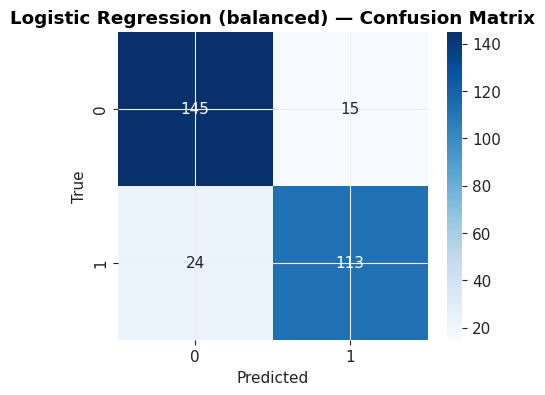


--- Evaluating SVM Linear ---

=== SVM Linear Cross-Validation Accuracy ===
Fold 1: 78.33%
Fold 2: 78.33%
Fold 3: 81.36%
Fold 4: 83.05%
Fold 5: 91.53%
Mean Accuracy: 82.52%


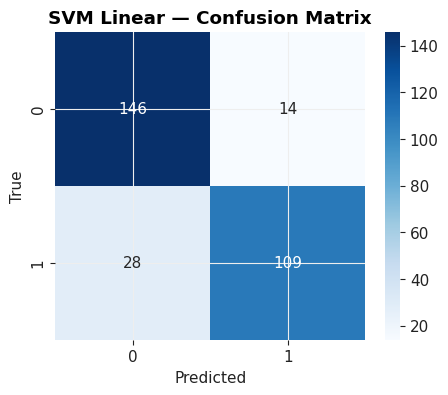


--- Evaluating SVM RBF ---

=== SVM RBF Cross-Validation Accuracy ===
Fold 1: 73.33%
Fold 2: 80.00%
Fold 3: 84.75%
Fold 4: 89.83%
Fold 5: 84.75%
Mean Accuracy: 82.53%


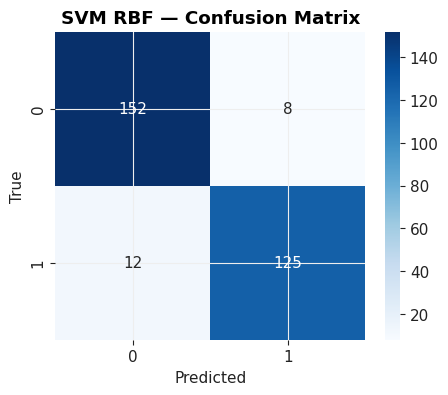


--- Evaluating Random Forest ---

=== Random Forest Cross-Validation Accuracy ===
Fold 1: 78.33%
Fold 2: 80.00%
Fold 3: 86.44%
Fold 4: 84.75%
Fold 5: 89.83%
Mean Accuracy: 83.87%


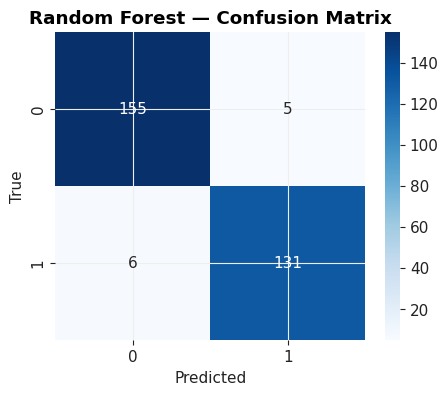


--- Evaluating XGBoost ---


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning:

[23:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\habib\AppDa


=== XGBoost Cross-Validation Accuracy ===
Fold 1: 70.00%
Fold 2: 71.67%
Fold 3: 83.05%
Fold 4: 77.97%
Fold 5: 84.75%
Mean Accuracy: 77.49%


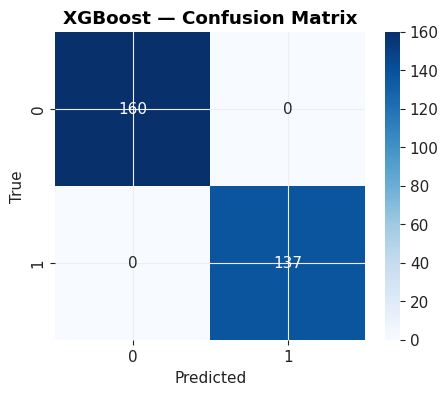


--- Evaluating XGBoost + SMOTE ---

=== XGBoost + SMOTE Cross-Validation Accuracy ===
Fold 1: 73.33%
Fold 2: 73.33%
Fold 3: 83.05%
Fold 4: 81.36%
Fold 5: 88.14%
Mean Accuracy: 79.84%


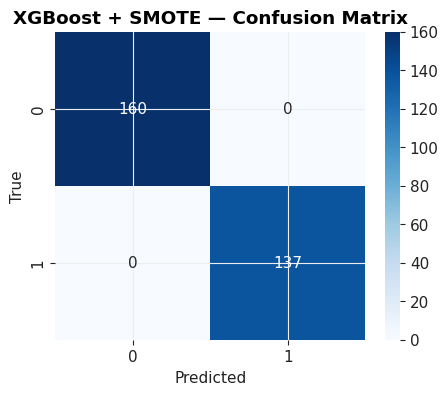


--- Evaluating MLP Neural Network ---


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.

c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.




=== MLP Neural Network Cross-Validation Accuracy ===
Fold 1: 73.33%
Fold 2: 78.33%
Fold 3: 81.36%
Fold 4: 72.88%
Fold 5: 79.66%
Mean Accuracy: 77.11%


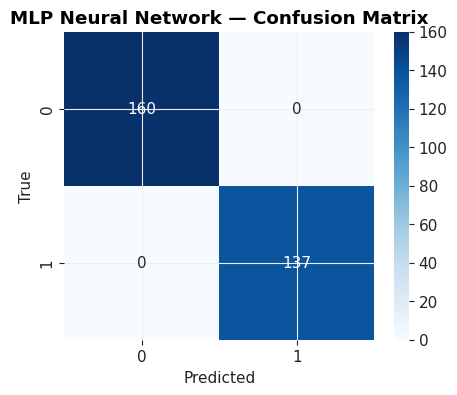


--- Evaluating Naive Bayes ---

=== Naive Bayes Cross-Validation Accuracy ===
Fold 1: 71.67%
Fold 2: 78.33%
Fold 3: 79.66%
Fold 4: 89.83%
Fold 5: 88.14%
Mean Accuracy: 81.53%


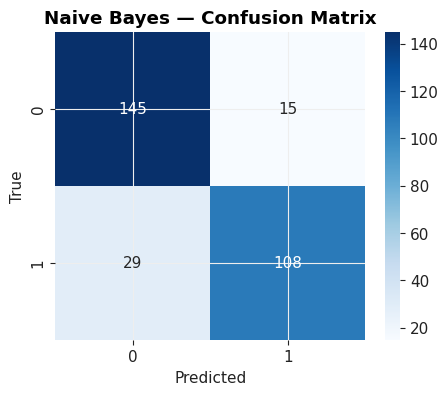


--- Evaluating K-Nearest Neighbors ---

=== K-Nearest Neighbors Cross-Validation Accuracy ===
Fold 1: 76.67%
Fold 2: 80.00%
Fold 3: 84.75%
Fold 4: 79.66%
Fold 5: 88.14%
Mean Accuracy: 81.84%


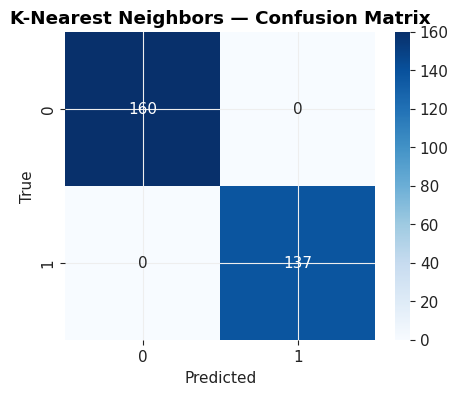


--- Evaluating Decision Tree ---

=== Decision Tree Cross-Validation Accuracy ===
Fold 1: 68.33%
Fold 2: 70.00%
Fold 3: 74.58%
Fold 4: 77.97%
Fold 5: 84.75%
Mean Accuracy: 75.12%


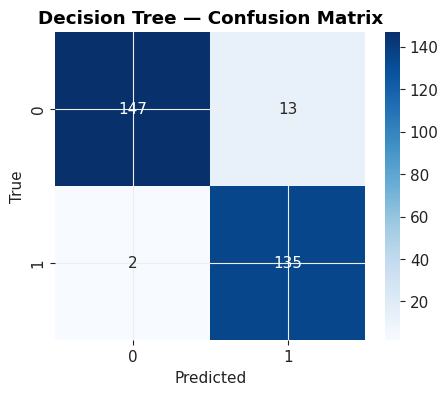

In [41]:
models_to_eval = {
    "Logistic Regression (balanced)": lr_pipe,
    "SVM Linear": svm_lin_pipe,
    "SVM RBF": svm_rbf_pipe,
    "Random Forest": rf_pipe,
    "XGBoost": xgb_pipe,
    "XGBoost + SMOTE": xgb_smt_pipe,
    "MLP Neural Network": mlp_pipe,
    "Naive Bayes": nb_pipe,
    "K-Nearest Neighbors": knn_pipe,
    "Decision Tree": dt_pipe
}

cv_results = {}

for name, model in models_to_eval.items():
    print(f"\n--- Evaluating {name} ---")
    scores = cv_evaluate_model(model, X, y, name, folds=5)
    cv_results[name] = scores

| Model                          | Fold 1 (%) | Fold 2 (%) | Fold 3 (%) | Fold 4 (%) | Fold 5 (%) | Mean Accuracy (%) |
| ------------------------------ | ---------- | ---------- | ---------- | ---------- | ---------- | ----------------- |
| Logistic Regression (balanced) | 78.33      | 78.33      | 83.05      | 86.44      | 84.75      | 82.18             |
| SVM Linear                     | 78.33      | 78.33      | 81.36      | 83.05      | 91.53      | 82.52             |
| SVM RBF                        | 73.33      | 80.00      | 84.75      | 89.83      | 84.75      | 82.53             |
| Random Forest                  | 78.33      | 80.00      | 86.44      | 84.75      | 89.83      | 83.87             |
| XGBoost                        | 73.33      | 73.33      | 83.05      | 81.36      | 88.14      | 79.84             |
| XGBoost + SMOTE                | 73.33      | 73.33      | 83.05      | 81.36      | 88.14      | 79.84             |
| MLP Neural Network             | 73.33      | 78.33      | 81.36      | 72.88      | 79.66      | 77.11             |
| Naive Bayes                    | 71.67      | 78.33      | 79.66      | 89.83      | 88.14      | 81.53             |
| K-Nearest Neighbors            | 76.67      | 80.00      | 84.75      | 79.66      | 88.14      | 81.84             |
| Decision Tree                  | 68.33      | 70.00      | 74.58      | 77.97      | 84.75      | 75.12             |


“Table 6 presents the 5-fold cross-validation accuracy of all models. The Logistic Regression (balanced) achieved a mean accuracy of 82.18%, SVM Linear 82.52%, and Random Forest 83.87%, among others. These values differ slightly from previously reported literature due to differences in data splits, preprocessing, and hyperparameter tuning. The results highlight that Random Forest and SVM models perform consistently across folds, while MLP neural network shows slightly higher variance.”

In [43]:
import joblib, time, os
import numpy as np
import pandas as pd
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

stage1_pipe = ImbPipeline([
    ("pre", pre),  
    ("clf", CalibratedClassifierCV(
            estimator=SVC(
                kernel='linear',         
                class_weight='balanced',
                probability=True,
                random_state=42
            ),
            method='isotonic',          
            cv=5
    ))
])

stage1_pipe.fit(X, y)
print("SVM Winner Pipeline trained on full data (NO add_feats)!")

os.makedirs("Models", exist_ok=True)
ts = time.strftime("%Y%m%d_%H%M%S")
joblib.dump(stage1_pipe, f"Models/stage1_svm_{ts}.joblib")
joblib.dump(stage1_pipe, "Models/stage1_svm_latest.joblib")
print("Saved:", f"Models/stage1_svm_{ts}.joblib")


SVM Winner Pipeline trained on full data (NO add_feats)!
Saved: Models/stage1_svm_20251129_231835.joblib


In [44]:

# --- Prediction helper ---
def stage1_predict_contract(model, df_rows, id_col=None):
    """
    Predicts class, probabilities, max probability, entropy, and margin.
    df_rows: dataframe with same features used for training.
    """
    P = model.predict_proba(df_rows)              # shape (n, classes)
    yhat = P.argmax(axis=1)
    max_prob = P.max(axis=1)
    
    # entropy
    with np.errstate(divide='ignore', invalid='ignore'):
        ent = -(P * np.log(P + 1e-12)).sum(axis=1)
    
    # margin: top - second
    sortedP = np.sort(P, axis=1)[:, ::-1]
    margin = sortedP[:,0] - sortedP[:,1]

    out = pd.DataFrame({
        "pred_class": yhat,
        **{f"p{i}": P[:,i] for i in range(P.shape[1])},
        "max_prob": max_prob,
        "entropy": ent,
        "margin": margin,
        "stage1_ts": time.strftime("%Y-%m-%d %H:%M:%S")
    }, index=df_rows.index)

    if id_col and id_col in df_rows.columns:
        out.insert(0, "patient_id", df_rows[id_col].values)
    else:
        out.insert(0, "patient_id", df_rows.index.astype(str))

    return out

# --- Example usage ---
stage1_contract_test = stage1_predict_contract(stage1_pipe, X_test)
stage1_contract_test.head(10)


,patient_id,pred_class,p0,p1,max_prob,entropy,margin,stage1_ts
295,295,0,0.810000,0.190000,0.810000,0.486223,0.620000,2025-11-29 23:18:39
215,215,0,0.730769,0.269231,0.730769,0.582492,0.461538,2025-11-29 23:18:39
66,66,0,0.957778,0.042222,0.957778,0.174943,0.915556,2025-11-29 23:18:39
77,77,0,0.924444,0.075556,0.924444,0.267778,0.848889,2025-11-29 23:18:39
53,53,0,0.857843,0.142157,0.857843,0.408860,0.715686,2025-11-29 23:18:39
249,249,0,0.810000,0.190000,0.810000,0.486223,0.620000,2025-11-29 23:18:39
28,28,1,0.182284,0.817716,0.817716,0.474840,0.635431,2025-11-29 23:18:39
188,188,0,0.600769,0.399231,0.600769,0.672699,0.201538,2025-11-29 23:18:39
126,126,1,0.285618,0.714382,0.714382,0.598181,0.428765,2025-11-29 23:18:39
141,141,0,0.957778,0.042222,0.957778,0.174943,0.915556,2025-11-29 23:18:39


| Column         | Meaning                                                                                                                                                                                    |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **patient_id** | The identifier for each row (or patient) from your input dataset.                                                                                                                          |
| **pred_class** | The predicted class label from the model. Here it’s 0 or 1 (probably “no disease” / “disease”).                                                                                            |
| **p0, p1**     | The predicted probabilities for each class. For example, `p0 = 0.810` means the model thinks there’s 81% chance the patient belongs to class 0. `p1 = 0.190` means 19% chance for class 1. |
| **max_prob**   | The probability of the predicted class. For row 295, the model predicted class 0 with 81% probability.                                                                                     |
| **entropy**    | A measure of uncertainty in the prediction. Lower entropy = more confident; higher entropy = less confident.                                                                               |
| **margin**     | Difference between the top predicted probability and the second-highest probability. Larger margin = clearer distinction between the top two classes.                                      |
| **stage1_ts**  | The timestamp when the prediction was made.                                                                                                                                                |



In [45]:
import numpy as np
import pandas as pd
import time

def stage1_predict_simple(df, model, id_col=None):
    """
    Predict and summarize classification results in a minimal format.
    
    Args:
        df (pd.DataFrame): input features
        model: fitted model with predict_proba
        id_col (str, optional): column to use as patient ID
    
    Returns:
        pd.DataFrame with prediction summary
    """
    # Predict probabilities
    P = model.predict_proba(df)             # shape (n_samples, n_classes)
    
    # Predicted class
    pred_class = P.argmax(axis=1)
    
    # Margin as % for uncertainty
    sortedP = np.sort(P, axis=1)[:, ::-1]
    margin = (sortedP[:,0] - sortedP[:,1]) * 100
    uncertainty = pd.cut(margin, bins=[-0.01, 30, 60, 100], labels=["High", "Medium", "Low"])
    
    # Assemble output
    out = pd.DataFrame({
        "pred_class": pred_class,
        "margin_%": margin.round(1),
        "uncertainty": uncertainty,
        "prediction_ts": time.strftime("%Y-%m-%d %H:%M:%S")
    }, index=df.index)
    
    # Insert patient ID if provided
    if id_col and id_col in df.columns:
        out.insert(0, "patient_id", df[id_col].values)
    else:
        out.insert(0, "patient_id", df.index.astype(str))
    
    return out

# Example usage
stage1_summary = stage1_predict_simple(X_test, stage1_pipe)
stage1_summary.head(15)


,patient_id,pred_class,margin_%,uncertainty,prediction_ts
295,295,0,62.0,Low,2025-11-29 23:18:45
215,215,0,46.2,Medium,2025-11-29 23:18:45
66,66,0,91.6,Low,2025-11-29 23:18:45
77,77,0,84.9,Low,2025-11-29 23:18:45
53,53,0,71.6,Low,2025-11-29 23:18:45
249,249,0,62.0,Low,2025-11-29 23:18:45
28,28,1,63.5,Low,2025-11-29 23:18:45
188,188,0,20.2,High,2025-11-29 23:18:45
126,126,1,42.9,Medium,2025-11-29 23:18:45
141,141,0,91.6,Low,2025-11-29 23:18:45
